In [27]:
from astropy.io import ascii
from astropy import table
from astropy.table import Table
import numpy as np
import os
from matplotlib import pyplot as plt

In [3]:
# Read data to a timestamp x file table
# Parameters: number of timestamps num_timestamps;
            # number of data files num_files; 
            # names of data files txtin; 
            # name of value column colname
# Returns: 2D NumPy array, rows representing timestamps & columns representing data files

def getInputByTimestamp(num_timestamps, num_files, txtin, colname):
    input_data = np.empty((num_timestamps, num_files))
    
    #for each .txt file in the directory
    for i in range(num_files):
        #read the current file's data table
        current_file = ascii.read(txtin[i])
        vals = current_file[colname]

        for j in range(num_timestamps):
            input_data[j][i] = vals[j]
            
    return input_data

In [11]:
allin = os.listdir()
txtin = [k for k in allin if '.txt' in k]
num_files = len(txtin)
num_timestamps = 64
colname = "col5"
data = getInputByTimestamp(num_timestamps, num_files, txtin, colname)

In [7]:
def rhoEffMass(num_timestamps, num_files, data):
    eff_mass = np.empty((num_timestamps-1, num_files))
    for j in range(num_timestamps-1):
        for i in range(num_files):
            eff_mass[j][i] = np.log( np.abs (data[j][i] / data[j+1][i]) )
    return eff_mass

In [14]:
rho_bar = rhoEffMass(num_timestamps, num_files, data)

In [22]:
def binData(num_timestamps, num_files, input_data):
    binned_data = np.empty(num_timestamps)

    #for each bin
    for i in range(num_timestamps):
        running_total = 0

        #for each data point
        for j in range(num_files):
            #copy all but one data point to a temporary array
            current_bin = [k for k in input_data[i] if k != j]
            #sum temporary array values
            running_total += np.average(current_bin)

        #add average 
        running_total /= (num_files)
        binned_data[i] = running_total
        
    return binned_data

In [23]:
jack_vals = binData(num_timestamps, num_files, data)

In [24]:
def jackEffMass(num_timestamps, vals):
    eff_mass = np.empty(num_timestamps - 1)
    for i in range(num_timestamps - 1):
        eff_mass[i] = np.log( np.abs (vals[i] / vals[i+1]) )
        
    return eff_mass

In [25]:
jack_errors = jackEffMass(num_timestamps, jack_vals)

ValueError: x and y must have same first dimension, but have shapes (1,) and (63, 733)

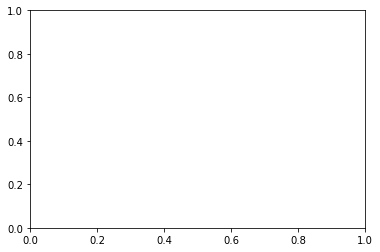

In [29]:
plt.plot(rho_bar[])
plt.show